In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('../../DataSets/Fin_singa/Income-comp_annual/chargeable_income_tax_v.csv')

In [3]:
df

,year_of_assessment,tax_group,no_of_companies_assessed,total_income,donations,chargeable_income,group_relief,loss_carryback_relief,ci_aft_reliefs,tax_exemption,ci_aft_exemption,gross_tax_payable,tax_deducted_at_source,other_tax_set_offs,net_tax_assessed
0,2003,Non-Taxable Group,76265,-15795056,3035,-15798091,na,na,na,na,na,na,na,na,na
1,2003,Taxable Group,28538,44428334,17165,44411169,na,na,na,na,na,na,na,na,na
2,2004,Non-Taxable Group,77484,-22026703,61064,-22087766,na,na,na,na,na,na,na,na,na
3,2004,Taxable Group,29360,36206700,19524,36187176,na,na,na,na,na,na,na,na,na
4,2005,Non-Taxable Group,80653,-20406048,76668,-20482716,na,na,na,na,na,na,na,na,na
5,2005,Taxable Group,29095,43310067,18463,43291604,na,na,na,na,na,na,na,na,na
6,2006,Non-Taxable Group,82535,-22186450,63207,-22249657,na,na,na,na,na,na,na,na,na
7,2006,Taxable Group,32032,49259749,28526,49231223,na,na,na,na,na,na,na,na,na
8,2007,Non-Taxable Group,87157,-33207602,64061,4259010,375948,6841,3876221,363999,3512222,388157,413751,28489,-54083
9,2007,Taxable Group,36401,65060166,80872,64979294,630173,20259,64328862,1341043,62987819,10670606,1002273,223336,9444997


In [4]:
df.dtypes

year_of_assessment           int64
tax_group                   object
no_of_companies_assessed     int64
total_income                 int64
donations                    int64
chargeable_income            int64
group_relief                object
loss_carryback_relief       object
ci_aft_reliefs              object
tax_exemption               object
ci_aft_exemption            object
gross_tax_payable           object
tax_deducted_at_source      object
other_tax_set_offs          object
net_tax_assessed            object
dtype: object

In [5]:
df.chargeable_income.value_counts()

-15798091     1
 44411169     1
 4717797      1
 133589903    1
 5013197      1
 123334452    1
 5712402      1
 117228242    1
 3945607      1
 110105243    1
 2738381      1
 105670433    1
 3967606      1
 104009430    1
 4036916      1
 90378295     1
 3108477      1
 79242030     1
 1921242      1
 79280663     1
 2740787      1
 77965813     1
 4113105      1
 64979294     1
 4259010      1
 49231223     1
-22249657     1
 43291604     1
-20482716     1
 36187176     1
-22087766     1
 155958893    1
Name: chargeable_income, dtype: int64

In [6]:
df.head(2)

,year_of_assessment,tax_group,no_of_companies_assessed,total_income,donations,chargeable_income,group_relief,loss_carryback_relief,ci_aft_reliefs,tax_exemption,ci_aft_exemption,gross_tax_payable,tax_deducted_at_source,other_tax_set_offs,net_tax_assessed
0,2003,Non-Taxable Group,76265,-15795056,3035,-15798091,na,na,na,na,na,na,na,na,na
1,2003,Taxable Group,28538,44428334,17165,44411169,na,na,na,na,na,na,na,na,na


In [7]:
df.columns

Index(['year_of_assessment', 'tax_group', 'no_of_companies_assessed',
       'total_income', 'donations', 'chargeable_income', 'group_relief',
       'loss_carryback_relief', 'ci_aft_reliefs', 'tax_exemption',
       'ci_aft_exemption', 'gross_tax_payable', 'tax_deducted_at_source',
       'other_tax_set_offs', 'net_tax_assessed'],
      dtype='object')

In [10]:
coltoclean = ['chargeable_income','group_relief', 'loss_carryback_relief', 'ci_aft_reliefs', 'tax_exemption', 'ci_aft_exemption', 'gross_tax_payable', 'tax_deducted_at_source', 'other_tax_set_offs', 'net_tax_assessed']

In [11]:
for i in coltoclean:
    df[i] = df[i].replace('na',np.nan,regex=True).astype('float64')

In [12]:
df.isnull().sum()

year_of_assessment          0
tax_group                   0
no_of_companies_assessed    0
total_income                0
donations                   0
chargeable_income           0
group_relief                8
loss_carryback_relief       8
ci_aft_reliefs              8
tax_exemption               8
ci_aft_exemption            8
gross_tax_payable           8
tax_deducted_at_source      8
other_tax_set_offs          8
net_tax_assessed            8
dtype: int64

In [13]:
df

,year_of_assessment,tax_group,no_of_companies_assessed,total_income,donations,chargeable_income,group_relief,loss_carryback_relief,ci_aft_reliefs,tax_exemption,ci_aft_exemption,gross_tax_payable,tax_deducted_at_source,other_tax_set_offs,net_tax_assessed
0,2003,Non-Taxable Group,76265,-15795056,3035,-15798091.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2003,Taxable Group,28538,44428334,17165,44411169.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2004,Non-Taxable Group,77484,-22026703,61064,-22087766.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2004,Taxable Group,29360,36206700,19524,36187176.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2005,Non-Taxable Group,80653,-20406048,76668,-20482716.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2005,Taxable Group,29095,43310067,18463,43291604.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2006,Non-Taxable Group,82535,-22186450,63207,-22249657.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2006,Taxable Group,32032,49259749,28526,49231223.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2007,Non-Taxable Group,87157,-33207602,64061,4259010.0,375948.0,6841.0,3876221.0,363999.0,3512222.0,388157.0,413751.0,28489.0,-54083.0
9,2007,Taxable Group,36401,65060166,80872,64979294.0,630173.0,20259.0,64328862.0,1341043.0,62987819.0,10670606.0,1002273.0,223336.0,9444997.0


In [14]:
df.chargeable_income = abs(df.chargeable_income) #abs returns the absolute value removing - sign.

In [15]:
df

,year_of_assessment,tax_group,no_of_companies_assessed,total_income,donations,chargeable_income,group_relief,loss_carryback_relief,ci_aft_reliefs,tax_exemption,ci_aft_exemption,gross_tax_payable,tax_deducted_at_source,other_tax_set_offs,net_tax_assessed
0,2003,Non-Taxable Group,76265,-15795056,3035,15798091.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2003,Taxable Group,28538,44428334,17165,44411169.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2004,Non-Taxable Group,77484,-22026703,61064,22087766.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2004,Taxable Group,29360,36206700,19524,36187176.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2005,Non-Taxable Group,80653,-20406048,76668,20482716.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2005,Taxable Group,29095,43310067,18463,43291604.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2006,Non-Taxable Group,82535,-22186450,63207,22249657.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2006,Taxable Group,32032,49259749,28526,49231223.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2007,Non-Taxable Group,87157,-33207602,64061,4259010.0,375948.0,6841.0,3876221.0,363999.0,3512222.0,388157.0,413751.0,28489.0,-54083.0
9,2007,Taxable Group,36401,65060166,80872,64979294.0,630173.0,20259.0,64328862.0,1341043.0,62987819.0,10670606.0,1002273.0,223336.0,9444997.0


In [16]:
nt = df[df.tax_group == 'Non-Taxable Group']
t = df[df.tax_group == 'Taxable Group']

In [17]:
ntpre = nt[nt.year_of_assessment < 2007]
ntpost = nt[nt.year_of_assessment > 2006]
tpre= t[t.year_of_assessment < 2007]
tpost = t[t.year_of_assessment > 2006]

In [18]:
def percentage_calculator(value,total_value):
    return(value.sum()/total_value.sum())*100

In [19]:
group_relief_per = percentage_calculator(tpost.group_relief,tpost.chargeable_income)
loss_carryback_relief_per = percentage_calculator(tpost.loss_carryback_relief,tpost.chargeable_income)

In [20]:
tpre.group_relief = tpre.chargeable_income*(group_relief_per/100)
tpre.loss_carryback_relief = tpre.chargeable_income*(loss_carryback_relief_per/100)

In [21]:
tpre.ci_aft_reliefs = tpre.chargeable_income-tpre.group_relief-tpre.loss_carryback_relief

In [22]:
tax_exemption_per = percentage_calculator(tpost.tax_exemption,tpost.ci_aft_reliefs)

In [23]:
tpre.tax_exemption = tpre.ci_aft_reliefs*(tax_exemption_per/100)

In [24]:
tpre.ci_aft_exemption = tpre.ci_aft_reliefs-tpre.tax_exemption

In [25]:
gross_tax_payable_per = percentage_calculator(tpost.gross_tax_payable,tpost.ci_aft_exemption)

In [26]:
tpre.gross_tax_payable = tpre.ci_aft_exemption*(gross_tax_payable_per/100)

In [27]:
tax_deducted_at_source_per = percentage_calculator(tpost.tax_deducted_at_source,tpost.gross_tax_payable)
other_tax_set_offs_per = percentage_calculator(tpost.other_tax_set_offs,tpost.gross_tax_payable)

In [28]:
tpre.tax_deducted_at_source = tpre.gross_tax_payable*(tax_deducted_at_source_per/100)
tpre.other_tax_set_offs = tpre.gross_tax_payable*(other_tax_set_offs_per/100)

In [29]:
tpre.net_tax_assessed = tpre.gross_tax_payable-tpre.tax_deducted_at_source-tpre.other_tax_set_offs

In [30]:
tpre

,year_of_assessment,tax_group,no_of_companies_assessed,total_income,donations,chargeable_income,group_relief,loss_carryback_relief,ci_aft_reliefs,tax_exemption,ci_aft_exemption,gross_tax_payable,tax_deducted_at_source,other_tax_set_offs,net_tax_assessed
1,2003,Taxable Group,28538,44428334,17165,44411169.0,740765.742265,20912.338471,4.364949e+07,1.831118e+06,4.181837e+07,5.730783e+06,56919.663498,392635.743081,5.281228e+06
3,2004,Taxable Group,29360,36206700,19524,36187176.0,603591.864247,17039.823312,3.556654e+07,1.492034e+06,3.407451e+07,4.669565e+06,46379.366435,319928.050954,4.303258e+06
5,2005,Taxable Group,29095,43310067,18463,43291604.0,722091.714607,20385.157522,4.254913e+07,1.784957e+06,4.076417e+07,5.586315e+06,55484.770779,382737.754679,5.148093e+06
7,2006,Taxable Group,32032,49259749,28526,49231223.0,821162.880180,23182.006282,4.838688e+07,2.029853e+06,4.635702e+07,6.352759e+06,63097.295339,435249.471263,5.854412e+06


In [31]:
ngroup_relief_per = percentage_calculator(ntpost.group_relief,ntpost.chargeable_income)
nloss_carryback_relief_per = percentage_calculator(ntpost.loss_carryback_relief,ntpost.chargeable_income)

In [32]:
ntpre.group_relief = ntpre.chargeable_income*(ngroup_relief_per/100)
ntpre.loss_carryback_relief = ntpre.chargeable_income*(nloss_carryback_relief_per/100)

In [33]:
ntpre.ci_aft_reliefs = ntpre.chargeable_income-ntpre.group_relief-ntpre.loss_carryback_relief

In [34]:
ntax_exemption_per = percentage_calculator(ntpost.tax_exemption,ntpost.ci_aft_reliefs)

In [35]:
ntpre.tax_exemption = ntpre.ci_aft_reliefs*(ntax_exemption_per/100)

In [36]:
ntpre.ci_aft_exemption = ntpre.ci_aft_reliefs-ntpre.tax_exemption

In [37]:
ngross_tax_payable_per = percentage_calculator(ntpost.gross_tax_payable,ntpost.ci_aft_exemption)

In [38]:
ntpre.gross_tax_payable = ntpre.ci_aft_exemption*(ngross_tax_payable_per/100)

In [39]:
ntax_deducted_at_source_per = percentage_calculator(ntpost.tax_deducted_at_source,ntpost.gross_tax_payable)
nother_tax_set_offs_per = percentage_calculator(ntpost.other_tax_set_offs,ntpost.gross_tax_payable)

In [40]:
ntpre.tax_deducted_at_source = ntpre.gross_tax_payable*(ntax_deducted_at_source_per/100)
ntpre.other_tax_set_offs = ntpre.gross_tax_payable*(nother_tax_set_offs_per/100)

In [41]:
ntpre.net_tax_assessed = ntpre.gross_tax_payable-ntpre.tax_deducted_at_source-ntpre.other_tax_set_offs

In [42]:
ntpre

,year_of_assessment,tax_group,no_of_companies_assessed,total_income,donations,chargeable_income,group_relief,loss_carryback_relief,ci_aft_reliefs,tax_exemption,ci_aft_exemption,gross_tax_payable,tax_deducted_at_source,other_tax_set_offs,net_tax_assessed
0,2003,Non-Taxable Group,76265,-15795056,3035,15798091.0,9.071825e+06,48894.524559,6.677372e+06,2.075939e+06,4.601432e+06,540204.615457,405669.059855,231301.426078,-96765.870476
2,2004,Non-Taxable Group,77484,-22026703,61064,22087766.0,1.268358e+07,68360.842910,9.335825e+06,2.902431e+06,6.433395e+06,755275.630349,567177.595541,323389.185103,-135291.150295
4,2005,Non-Taxable Group,80653,-20406048,76668,20482716.0,1.176190e+07,63393.270775,8.657420e+06,2.691520e+06,5.965900e+06,700392.073973,525962.544652,299889.487961,-125459.958640
6,2006,Non-Taxable Group,82535,-22186450,63207,22249657.0,1.277654e+07,68861.889744,9.404252e+06,2.923704e+06,6.480548e+06,760811.379282,571334.690836,325759.447381,-136282.758935


In [43]:
dffilled = pd.concat([ntpre,ntpost,tpre,tpost],)

In [44]:
dffilled = dffilled.sort_values(by=['year_of_assessment','tax_group'],ascending=True)

In [45]:
dffilled

,year_of_assessment,tax_group,no_of_companies_assessed,total_income,donations,chargeable_income,group_relief,loss_carryback_relief,ci_aft_reliefs,tax_exemption,ci_aft_exemption,gross_tax_payable,tax_deducted_at_source,other_tax_set_offs,net_tax_assessed
0,2003,Non-Taxable Group,76265,-15795056,3035,15798091.0,9.071825e+06,48894.524559,6.677372e+06,2.075939e+06,4.601432e+06,5.402046e+05,4.056691e+05,2.313014e+05,-9.676587e+04
1,2003,Taxable Group,28538,44428334,17165,44411169.0,7.407657e+05,20912.338471,4.364949e+07,1.831118e+06,4.181837e+07,5.730783e+06,5.691966e+04,3.926357e+05,5.281228e+06
2,2004,Non-Taxable Group,77484,-22026703,61064,22087766.0,1.268358e+07,68360.842910,9.335825e+06,2.902431e+06,6.433395e+06,7.552756e+05,5.671776e+05,3.233892e+05,-1.352912e+05
3,2004,Taxable Group,29360,36206700,19524,36187176.0,6.035919e+05,17039.823312,3.556654e+07,1.492034e+06,3.407451e+07,4.669565e+06,4.637937e+04,3.199281e+05,4.303258e+06
4,2005,Non-Taxable Group,80653,-20406048,76668,20482716.0,1.176190e+07,63393.270775,8.657420e+06,2.691520e+06,5.965900e+06,7.003921e+05,5.259625e+05,2.998895e+05,-1.254600e+05
5,2005,Taxable Group,29095,43310067,18463,43291604.0,7.220917e+05,20385.157522,4.254913e+07,1.784957e+06,4.076417e+07,5.586315e+06,5.548477e+04,3.827378e+05,5.148093e+06
6,2006,Non-Taxable Group,82535,-22186450,63207,22249657.0,1.277654e+07,68861.889744,9.404252e+06,2.923704e+06,6.480548e+06,7.608114e+05,5.713347e+05,3.257594e+05,-1.362828e+05
7,2006,Taxable Group,32032,49259749,28526,49231223.0,8.211629e+05,23182.006282,4.838688e+07,2.029853e+06,4.635702e+07,6.352759e+06,6.309730e+04,4.352495e+05,5.854412e+06
8,2007,Non-Taxable Group,87157,-33207602,64061,4259010.0,3.759480e+05,6841.000000,3.876221e+06,3.639990e+05,3.512222e+06,3.881570e+05,4.137510e+05,2.848900e+04,-5.408300e+04
9,2007,Taxable Group,36401,65060166,80872,64979294.0,6.301730e+05,20259.000000,6.432886e+07,1.341043e+06,6.298782e+07,1.067061e+07,1.002273e+06,2.233360e+05,9.444997e+06


In [46]:
dffilled.describe()

,year_of_assessment,no_of_companies_assessed,total_income,donations,chargeable_income,group_relief,loss_carryback_relief,ci_aft_reliefs,tax_exemption,ci_aft_exemption,gross_tax_payable,tax_deducted_at_source,other_tax_set_offs,net_tax_assessed
count,32.000000,32.00000,3.200000e+01,3.200000e+01,3.200000e+01,3.200000e+01,32.000000,3.200000e+01,3.200000e+01,3.200000e+01,3.200000e+01,3.200000e+01,3.200000e+01,3.200000e+01
mean,2010.500000,79285.31250,1.346364e+07,6.922726e+05,4.817989e+07,3.014558e+06,33092.495424,4.513224e+07,2.344080e+06,4.278816e+07,5.840999e+06,1.584925e+05,4.489548e+05,5.233551e+06
std,4.683533,35026.97893,8.407716e+07,9.117039e+05,4.799387e+07,3.454228e+06,22176.782640,4.887277e+07,1.818827e+06,4.721422e+07,6.305701e+06,2.623848e+05,5.253098e+05,5.921460e+06
min,2003.000000,28538.00000,-1.251777e+08,3.035000e+03,1.921242e+06,3.759480e+05,6841.000000,6.565780e+05,3.639990e+05,2.255100e+05,3.644000e+04,5.050000e+02,2.643700e+04,-1.362828e+05
25%,2006.750000,51505.75000,-6.049385e+07,7.351625e+04,4.222534e+06,9.806865e+05,14532.250000,1.571734e+06,5.708218e+05,1.000912e+06,7.601525e+04,5.676250e+03,5.612225e+04,-1.861775e+04
50%,2010.500000,76536.50000,1.020582e+07,3.640650e+05,2.921842e+07,1.964991e+06,22047.172376,2.248540e+07,1.930486e+06,2.027753e+07,2.715188e+06,1.608650e+04,3.099088e+05,2.148694e+06
75%,2014.250000,106766.00000,8.226838e+07,8.215185e+05,8.205507e+07,3.018572e+06,50753.500000,8.090069e+07,3.830038e+06,7.711505e+07,1.132650e+07,1.487402e+05,4.506124e+05,1.087615e+07
max,2018.000000,152188.00000,1.563693e+08,3.661936e+06,1.559589e+08,1.277654e+07,72969.000000,1.540059e+08,5.467281e+06,1.486258e+08,1.742552e+07,1.002273e+06,1.745725e+06,1.567829e+07


## Visualizations

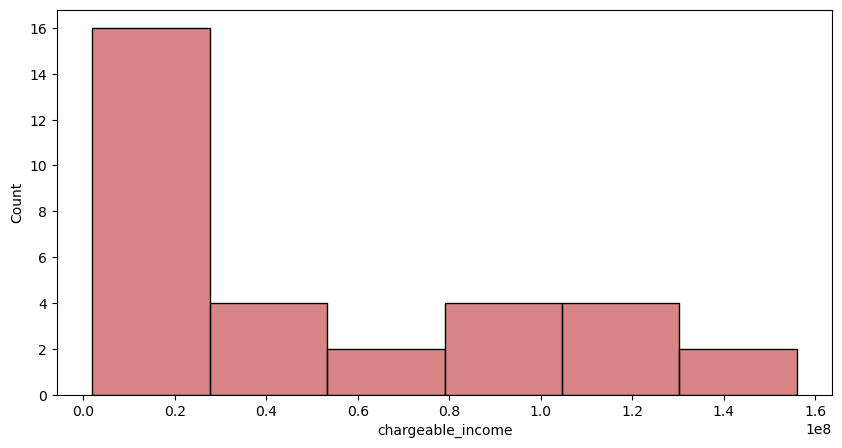

In [107]:
plt.figure(figsize=(10,5))
sb.histplot(df.chargeable_income,color='indianred')
plt.show()

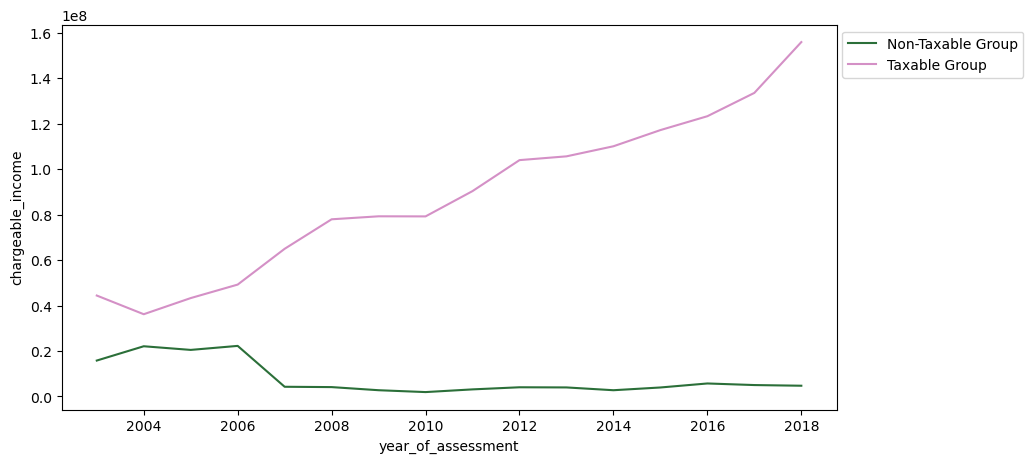

In [106]:
plt.figure(figsize=(10,5))
sb.lineplot(x=df.year_of_assessment,y=df.chargeable_income,errorbar=None,hue=df.tax_group,palette='cubehelix')
plt.legend(bbox_to_anchor=(1.25,1))
plt.show()

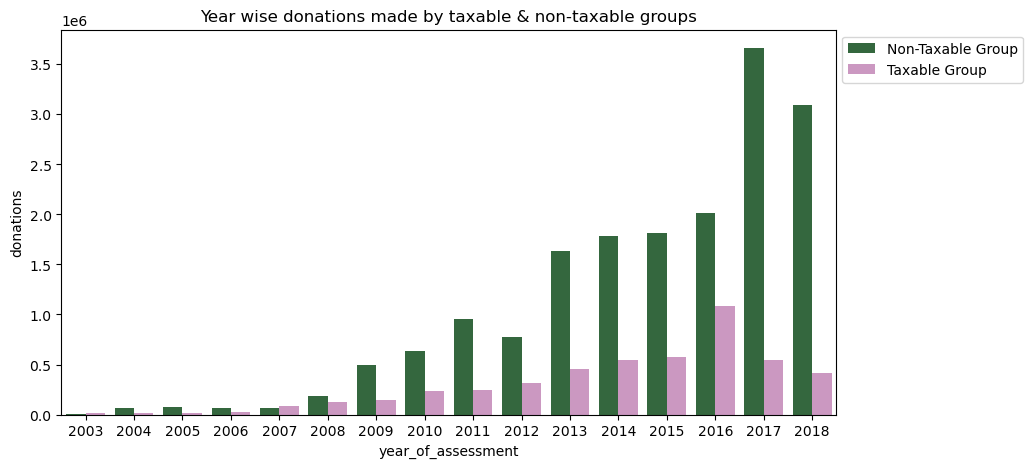

In [108]:
plt.figure(figsize=(10,5))
sb.barplot(x=df.year_of_assessment,y=df.donations,hue=df.tax_group,palette='cubehelix')
plt.title('Year wise donations made by taxable & non-taxable groups')
plt.legend(bbox_to_anchor=(1.25,1))
plt.show()

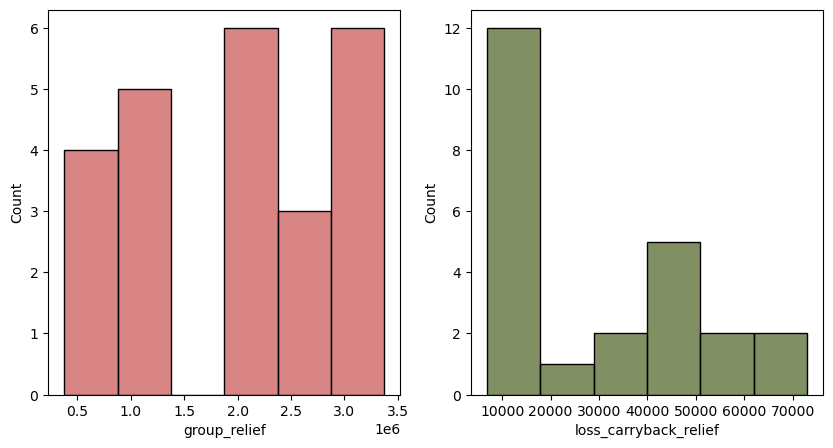

In [97]:
fig = plt.figure(figsize=(10,5))

fig.add_subplot(121)
sb.histplot(df.group_relief,color='indianred')

fig.add_subplot(122)
sb.histplot(df.loss_carryback_relief,color='darkolivegreen')

plt.show()

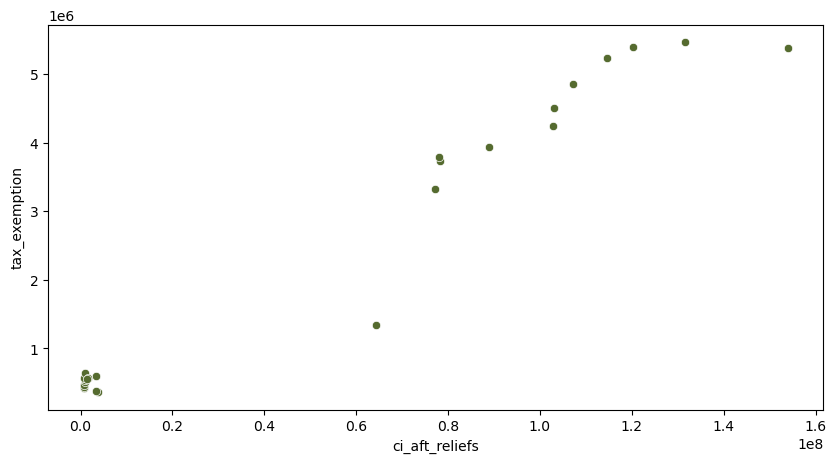

In [109]:
fig = plt.figure(figsize=(10,5))
sb.scatterplot(x=df.ci_aft_reliefs,y=df.tax_exemption,color='darkolivegreen')
plt.show()

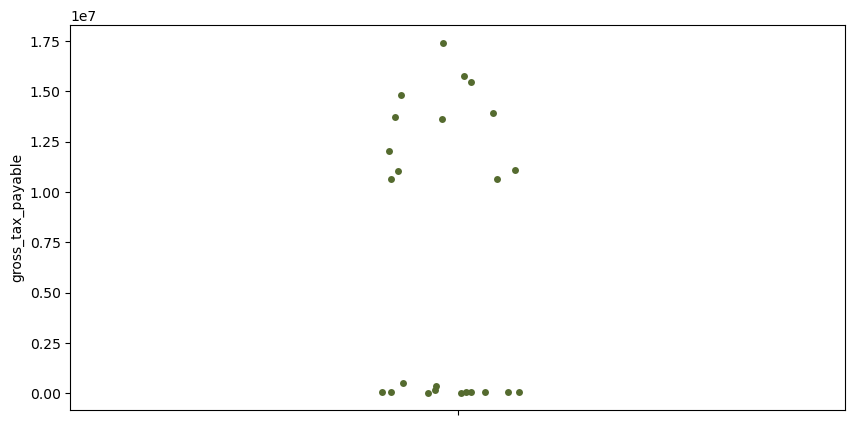

In [110]:
fig = plt.figure(figsize=(10,5))
sb.stripplot(df.gross_tax_payable,color='darkolivegreen')
plt.show()

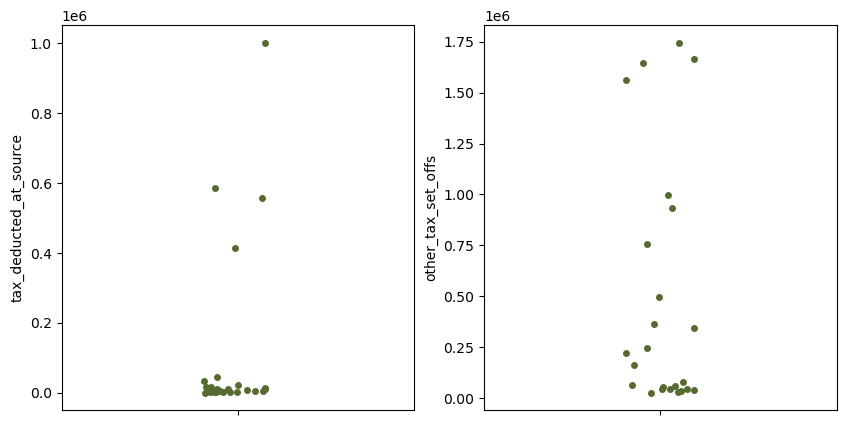

In [100]:
fig = plt.figure(figsize=(10,5))

fig.add_subplot(121)
sb.stripplot(df.tax_deducted_at_source,color='darkolivegreen')

fig.add_subplot(122)
sb.stripplot(df.other_tax_set_offs,color='darkolivegreen')
plt.show()

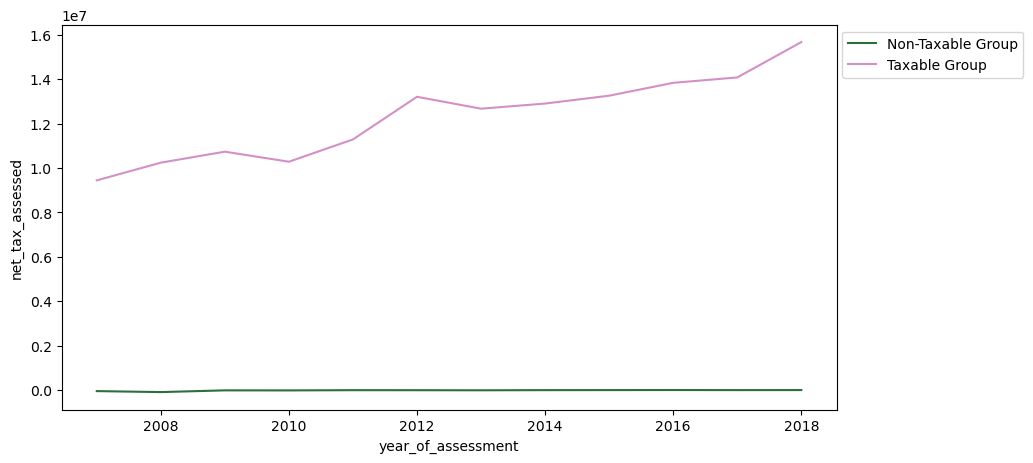

In [111]:
plt.figure(figsize=(10,5))
sb.lineplot(x=df.year_of_assessment,y=df.net_tax_assessed,hue=df.tax_group,errorbar=None,palette='cubehelix')
plt.legend(bbox_to_anchor=(1.25,1))
plt.show()

In [55]:
df.head(2)

,year_of_assessment,tax_group,no_of_companies_assessed,total_income,donations,chargeable_income,group_relief,loss_carryback_relief,ci_aft_reliefs,tax_exemption,ci_aft_exemption,gross_tax_payable,tax_deducted_at_source,other_tax_set_offs,net_tax_assessed
0,2003,Non-Taxable Group,76265,-15795056,3035,15798091.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2003,Taxable Group,28538,44428334,17165,44411169.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# ML 

In [56]:
dt=pd.get_dummies(data=dffilled,columns=['tax_group'],drop_first=True)
dt

,year_of_assessment,no_of_companies_assessed,total_income,donations,chargeable_income,group_relief,loss_carryback_relief,ci_aft_reliefs,tax_exemption,ci_aft_exemption,gross_tax_payable,tax_deducted_at_source,other_tax_set_offs,net_tax_assessed,tax_group_Taxable Group
0,2003,76265,-15795056,3035,15798091.0,9.071825e+06,48894.524559,6.677372e+06,2.075939e+06,4.601432e+06,5.402046e+05,4.056691e+05,2.313014e+05,-9.676587e+04,0
1,2003,28538,44428334,17165,44411169.0,7.407657e+05,20912.338471,4.364949e+07,1.831118e+06,4.181837e+07,5.730783e+06,5.691966e+04,3.926357e+05,5.281228e+06,1
2,2004,77484,-22026703,61064,22087766.0,1.268358e+07,68360.842910,9.335825e+06,2.902431e+06,6.433395e+06,7.552756e+05,5.671776e+05,3.233892e+05,-1.352912e+05,0
3,2004,29360,36206700,19524,36187176.0,6.035919e+05,17039.823312,3.556654e+07,1.492034e+06,3.407451e+07,4.669565e+06,4.637937e+04,3.199281e+05,4.303258e+06,1
4,2005,80653,-20406048,76668,20482716.0,1.176190e+07,63393.270775,8.657420e+06,2.691520e+06,5.965900e+06,7.003921e+05,5.259625e+05,2.998895e+05,-1.254600e+05,0
5,2005,29095,43310067,18463,43291604.0,7.220917e+05,20385.157522,4.254913e+07,1.784957e+06,4.076417e+07,5.586315e+06,5.548477e+04,3.827378e+05,5.148093e+06,1
6,2006,82535,-22186450,63207,22249657.0,1.277654e+07,68861.889744,9.404252e+06,2.923704e+06,6.480548e+06,7.608114e+05,5.713347e+05,3.257594e+05,-1.362828e+05,0
7,2006,32032,49259749,28526,49231223.0,8.211629e+05,23182.006282,4.838688e+07,2.029853e+06,4.635702e+07,6.352759e+06,6.309730e+04,4.352495e+05,5.854412e+06,1
8,2007,87157,-33207602,64061,4259010.0,3.759480e+05,6841.000000,3.876221e+06,3.639990e+05,3.512222e+06,3.881570e+05,4.137510e+05,2.848900e+04,-5.408300e+04,0
9,2007,36401,65060166,80872,64979294.0,6.301730e+05,20259.000000,6.432886e+07,1.341043e+06,6.298782e+07,1.067061e+07,1.002273e+06,2.233360e+05,9.444997e+06,1


In [57]:
dt.corr()

,year_of_assessment,no_of_companies_assessed,total_income,donations,chargeable_income,group_relief,loss_carryback_relief,ci_aft_reliefs,tax_exemption,ci_aft_exemption,gross_tax_payable,tax_deducted_at_source,other_tax_set_offs,net_tax_assessed,tax_group_Taxable Group
year_of_assessment,1.000000e+00,0.573768,-0.000218,0.700166,0.304952,-0.269894,-0.108403,0.318593,0.211527,0.321636,0.282041,-0.550670,0.406264,0.288702,1.565468e-16
no_of_companies_assessed,5.737676e-01,1.000000,-0.777490,0.810920,-0.550650,0.189495,-0.427776,-0.553946,-0.509280,-0.553786,-0.594192,-0.206276,-0.331857,-0.594169,-8.090784e-01
total_income,-2.182040e-04,-0.777490,1.000000,-0.588078,0.945892,-0.230393,0.615833,0.944886,0.890412,0.943777,0.950165,-0.055037,0.800773,0.943221,9.095501e-01
donations,7.001663e-01,0.810920,-0.588078,1.000000,-0.325121,-0.063172,-0.459148,-0.314601,-0.363197,-0.311661,-0.331126,-0.385191,-0.193858,-0.318346,-4.341653e-01
chargeable_income,3.049524e-01,-0.550650,0.945892,-0.325121,1.000000,-0.224390,0.596898,0.997605,0.937702,0.996526,0.987977,-0.193750,0.896592,0.981133,8.520490e-01
group_relief,-2.698941e-01,0.189495,-0.230393,-0.063172,-0.224390,1.000000,0.493367,-0.291257,0.077240,-0.304464,-0.327000,0.403044,-0.056989,-0.361023,-4.528429e-01
loss_carryback_relief,-1.084026e-01,-0.427776,0.615833,-0.459148,0.596898,0.493367,1.000000,0.550839,0.801374,0.539318,0.539978,0.118816,0.547302,0.521199,3.915682e-01
ci_aft_reliefs,3.185930e-01,-0.553946,0.944886,-0.314601,0.997605,-0.291257,0.550839,1.000000,0.915016,0.999879,0.993077,-0.218806,0.884247,0.988768,8.685544e-01
tax_exemption,2.115267e-01,-0.509280,0.890412,-0.363197,0.937702,0.077240,0.801374,0.915016,1.000000,0.908636,0.895873,-0.142948,0.880294,0.882247,7.272656e-01
ci_aft_exemption,3.216361e-01,-0.553786,0.943777,-0.311661,0.996526,-0.304464,0.539318,0.999879,0.908636,1.000000,0.993450,-0.220985,0.881398,0.989515,8.710489e-01


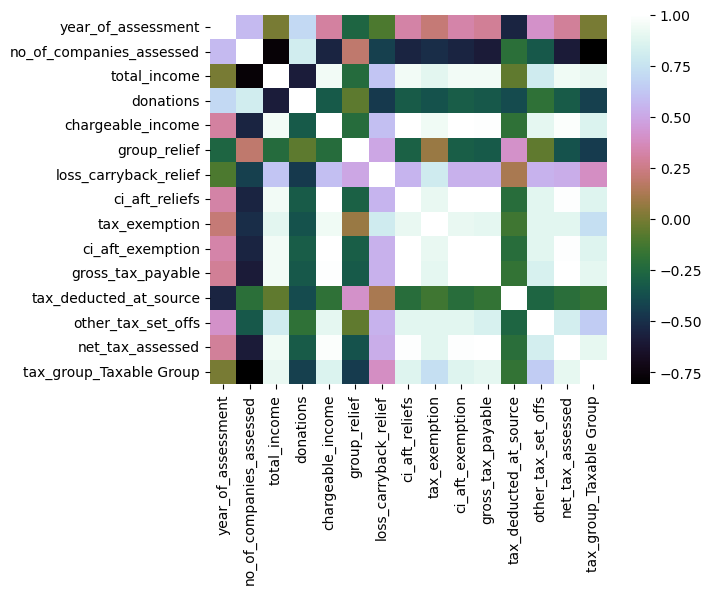

In [58]:
sb.heatmap(dt.corr(),cmap='cubehelix')
plt.show()

In [59]:
dt=dt.drop(['no_of_companies_assessed','donations','group_relief','ci_aft_reliefs','ci_aft_exemption'],axis=1)
dt

,year_of_assessment,total_income,chargeable_income,loss_carryback_relief,tax_exemption,gross_tax_payable,tax_deducted_at_source,other_tax_set_offs,net_tax_assessed,tax_group_Taxable Group
0,2003,-15795056,15798091.0,48894.524559,2.075939e+06,5.402046e+05,4.056691e+05,2.313014e+05,-9.676587e+04,0
1,2003,44428334,44411169.0,20912.338471,1.831118e+06,5.730783e+06,5.691966e+04,3.926357e+05,5.281228e+06,1
2,2004,-22026703,22087766.0,68360.842910,2.902431e+06,7.552756e+05,5.671776e+05,3.233892e+05,-1.352912e+05,0
3,2004,36206700,36187176.0,17039.823312,1.492034e+06,4.669565e+06,4.637937e+04,3.199281e+05,4.303258e+06,1
4,2005,-20406048,20482716.0,63393.270775,2.691520e+06,7.003921e+05,5.259625e+05,2.998895e+05,-1.254600e+05,0
5,2005,43310067,43291604.0,20385.157522,1.784957e+06,5.586315e+06,5.548477e+04,3.827378e+05,5.148093e+06,1
6,2006,-22186450,22249657.0,68861.889744,2.923704e+06,7.608114e+05,5.713347e+05,3.257594e+05,-1.362828e+05,0
7,2006,49259749,49231223.0,23182.006282,2.029853e+06,6.352759e+06,6.309730e+04,4.352495e+05,5.854412e+06,1
8,2007,-33207602,4259010.0,6841.000000,3.639990e+05,3.881570e+05,4.137510e+05,2.848900e+04,-5.408300e+04,0
9,2007,65060166,64979294.0,20259.000000,1.341043e+06,1.067061e+07,1.002273e+06,2.233360e+05,9.444997e+06,1


In [60]:
x=dt.drop('tax_group_Taxable Group',axis=1).values
x

array([[ 2.00300000e+03, -1.57950560e+07,  1.57980910e+07,
         4.88945246e+04,  2.07593943e+06,  5.40204615e+05,
         4.05669060e+05,  2.31301426e+05, -9.67658705e+04],
       [ 2.00300000e+03,  4.44283340e+07,  4.44111690e+07,
         2.09123385e+04,  1.83111770e+06,  5.73078310e+06,
         5.69196635e+04,  3.92635743e+05,  5.28122770e+06],
       [ 2.00400000e+03, -2.20267030e+07,  2.20877660e+07,
         6.83608429e+04,  2.90243070e+06,  7.55275630e+05,
         5.67177596e+05,  3.23389185e+05, -1.35291150e+05],
       [ 2.00400000e+03,  3.62067000e+07,  3.61871760e+07,
         1.70398233e+04,  1.49203410e+06,  4.66956537e+06,
         4.63793664e+04,  3.19928051e+05,  4.30325795e+06],
       [ 2.00500000e+03, -2.04060480e+07,  2.04827160e+07,
         6.33932708e+04,  2.69151999e+06,  7.00392074e+05,
         5.25962545e+05,  2.99889488e+05, -1.25459959e+05],
       [ 2.00500000e+03,  4.33100670e+07,  4.32916040e+07,
         2.03851575e+04,  1.78495690e+06,  5.586315

In [61]:
y=dt['tax_group_Taxable Group'].values
y

array([0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1], dtype=uint8)

In [62]:
from sklearn.model_selection import train_test_split,cross_val_score
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [63]:
from sklearn.tree import DecisionTreeClassifier
model_2=DecisionTreeClassifier()
model_2.fit(x_train,y_train)

DecisionTreeClassifier()

In [64]:
y_pred=model_2.predict(x_test)
y_pred

array([0, 0, 0, 1, 0, 0, 0], dtype=uint8)

In [65]:
from sklearn.metrics import accuracy_score,mean_squared_error,confusion_matrix
DTC=accuracy_score(y_test,y_pred)
DTC

1.0

In [66]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[6, 0],
       [0, 1]], dtype=int64)

In [67]:
model_2_cv = DecisionTreeClassifier()
sc_2=cross_val_score(model_2,x,y,cv=10,scoring='accuracy')
sc_2

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [68]:
mse_2=mean_squared_error(y_test,y_pred)
mse_2

0.0

In [69]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [70]:
xn = scaler.fit_transform(x)
yn = scaler.fit_transform(y.reshape(-1, 1))

In [71]:
xtra,xtes,ytra,ytes = train_test_split(xn,yn,test_size=0.2)

In [72]:
model_sc = DecisionTreeClassifier()

In [73]:
model_sc.fit(xn,yn)

DecisionTreeClassifier()

In [74]:
y_pr= model_sc.predict(xtes)

In [75]:
y_pr

array([ 1.,  1.,  1., -1.,  1.,  1., -1.])

In [76]:
mse_sc = mean_squared_error(ytes,y_pr)
mse_sc

0.0

In [77]:
from sklearn.metrics import r2_score,confusion_matrix

In [78]:
r2_sc=r2_score(ytes,y_pr)
r2_sc

1.0

In [79]:
cm_sc=confusion_matrix(ytes,y_pr)
cm_sc

array([[2, 0],
       [0, 5]], dtype=int64)

In [80]:
model_sc_opt = DecisionTreeClassifier()
model_sc_opt.fit(x,y)

DecisionTreeClassifier()

In [81]:
y_predict= model_sc_opt.predict(x)
y_predict

array([0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1], dtype=uint8)

In [82]:
mse_sc_opt = mean_squared_error(y,y_predict)
mse_sc_opt

0.0

In [83]:
r2_sc_opt = r2_score(y,y_predict)
r2_sc_opt

1.0

In [84]:
cm_opt=confusion_matrix(y,y_predict)
cm_opt

array([[16,  0],
       [ 0, 16]], dtype=int64)

In [85]:
dffilled['Predicted'] = y_predict
dffilled

,year_of_assessment,tax_group,no_of_companies_assessed,total_income,donations,chargeable_income,group_relief,loss_carryback_relief,ci_aft_reliefs,tax_exemption,ci_aft_exemption,gross_tax_payable,tax_deducted_at_source,other_tax_set_offs,net_tax_assessed,Predicted
0,2003,Non-Taxable Group,76265,-15795056,3035,15798091.0,9.071825e+06,48894.524559,6.677372e+06,2.075939e+06,4.601432e+06,5.402046e+05,4.056691e+05,2.313014e+05,-9.676587e+04,0
1,2003,Taxable Group,28538,44428334,17165,44411169.0,7.407657e+05,20912.338471,4.364949e+07,1.831118e+06,4.181837e+07,5.730783e+06,5.691966e+04,3.926357e+05,5.281228e+06,1
2,2004,Non-Taxable Group,77484,-22026703,61064,22087766.0,1.268358e+07,68360.842910,9.335825e+06,2.902431e+06,6.433395e+06,7.552756e+05,5.671776e+05,3.233892e+05,-1.352912e+05,0
3,2004,Taxable Group,29360,36206700,19524,36187176.0,6.035919e+05,17039.823312,3.556654e+07,1.492034e+06,3.407451e+07,4.669565e+06,4.637937e+04,3.199281e+05,4.303258e+06,1
4,2005,Non-Taxable Group,80653,-20406048,76668,20482716.0,1.176190e+07,63393.270775,8.657420e+06,2.691520e+06,5.965900e+06,7.003921e+05,5.259625e+05,2.998895e+05,-1.254600e+05,0
5,2005,Taxable Group,29095,43310067,18463,43291604.0,7.220917e+05,20385.157522,4.254913e+07,1.784957e+06,4.076417e+07,5.586315e+06,5.548477e+04,3.827378e+05,5.148093e+06,1
6,2006,Non-Taxable Group,82535,-22186450,63207,22249657.0,1.277654e+07,68861.889744,9.404252e+06,2.923704e+06,6.480548e+06,7.608114e+05,5.713347e+05,3.257594e+05,-1.362828e+05,0
7,2006,Taxable Group,32032,49259749,28526,49231223.0,8.211629e+05,23182.006282,4.838688e+07,2.029853e+06,4.635702e+07,6.352759e+06,6.309730e+04,4.352495e+05,5.854412e+06,1
8,2007,Non-Taxable Group,87157,-33207602,64061,4259010.0,3.759480e+05,6841.000000,3.876221e+06,3.639990e+05,3.512222e+06,3.881570e+05,4.137510e+05,2.848900e+04,-5.408300e+04,0
9,2007,Taxable Group,36401,65060166,80872,64979294.0,6.301730e+05,20259.000000,6.432886e+07,1.341043e+06,6.298782e+07,1.067061e+07,1.002273e+06,2.233360e+05,9.444997e+06,1


In [86]:
dffilled.Predicted = dffilled.Predicted.replace({0:'Non-Taxable Group',1:'Taxable Group'})


In [87]:
dffilled

,year_of_assessment,tax_group,no_of_companies_assessed,total_income,donations,chargeable_income,group_relief,loss_carryback_relief,ci_aft_reliefs,tax_exemption,ci_aft_exemption,gross_tax_payable,tax_deducted_at_source,other_tax_set_offs,net_tax_assessed,Predicted
0,2003,Non-Taxable Group,76265,-15795056,3035,15798091.0,9.071825e+06,48894.524559,6.677372e+06,2.075939e+06,4.601432e+06,5.402046e+05,4.056691e+05,2.313014e+05,-9.676587e+04,Non-Taxable Group
1,2003,Taxable Group,28538,44428334,17165,44411169.0,7.407657e+05,20912.338471,4.364949e+07,1.831118e+06,4.181837e+07,5.730783e+06,5.691966e+04,3.926357e+05,5.281228e+06,Taxable Group
2,2004,Non-Taxable Group,77484,-22026703,61064,22087766.0,1.268358e+07,68360.842910,9.335825e+06,2.902431e+06,6.433395e+06,7.552756e+05,5.671776e+05,3.233892e+05,-1.352912e+05,Non-Taxable Group
3,2004,Taxable Group,29360,36206700,19524,36187176.0,6.035919e+05,17039.823312,3.556654e+07,1.492034e+06,3.407451e+07,4.669565e+06,4.637937e+04,3.199281e+05,4.303258e+06,Taxable Group
4,2005,Non-Taxable Group,80653,-20406048,76668,20482716.0,1.176190e+07,63393.270775,8.657420e+06,2.691520e+06,5.965900e+06,7.003921e+05,5.259625e+05,2.998895e+05,-1.254600e+05,Non-Taxable Group
5,2005,Taxable Group,29095,43310067,18463,43291604.0,7.220917e+05,20385.157522,4.254913e+07,1.784957e+06,4.076417e+07,5.586315e+06,5.548477e+04,3.827378e+05,5.148093e+06,Taxable Group
6,2006,Non-Taxable Group,82535,-22186450,63207,22249657.0,1.277654e+07,68861.889744,9.404252e+06,2.923704e+06,6.480548e+06,7.608114e+05,5.713347e+05,3.257594e+05,-1.362828e+05,Non-Taxable Group
7,2006,Taxable Group,32032,49259749,28526,49231223.0,8.211629e+05,23182.006282,4.838688e+07,2.029853e+06,4.635702e+07,6.352759e+06,6.309730e+04,4.352495e+05,5.854412e+06,Taxable Group
8,2007,Non-Taxable Group,87157,-33207602,64061,4259010.0,3.759480e+05,6841.000000,3.876221e+06,3.639990e+05,3.512222e+06,3.881570e+05,4.137510e+05,2.848900e+04,-5.408300e+04,Non-Taxable Group
9,2007,Taxable Group,36401,65060166,80872,64979294.0,6.301730e+05,20259.000000,6.432886e+07,1.341043e+06,6.298782e+07,1.067061e+07,1.002273e+06,2.233360e+05,9.444997e+06,Taxable Group


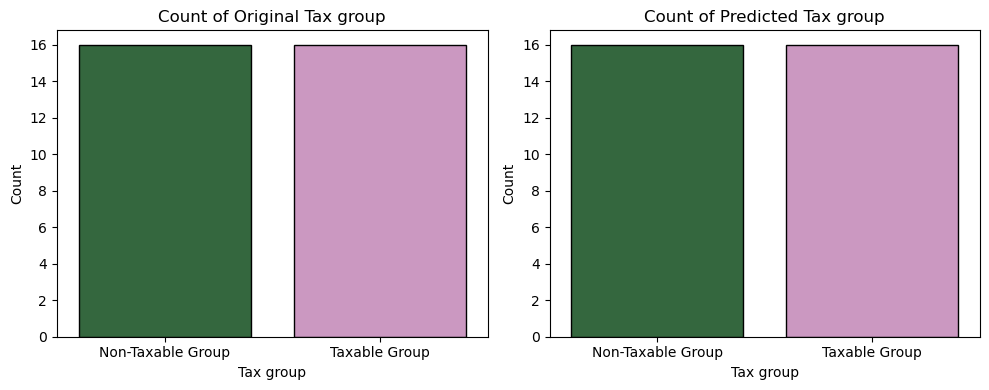

In [102]:
fig, axs = plt.subplots(1, 2, figsize=(10,4))

sb.countplot(x=dffilled.tax_group, palette='cubehelix', edgecolor='black', ax=axs[0])
axs[0].set_title('Count of Original Tax group')
axs[0].set_xlabel('Tax group')
axs[0].set_ylabel('Count')
axs[0].tick_params(axis='x')

sb.countplot(x=dffilled.Predicted, palette="cubehelix", edgecolor='black', ax=axs[1])
axs[1].set_title('Count of Predicted Tax group')
axs[1].set_xlabel('Tax group')
axs[1].set_ylabel('Count')
axs[1].tick_params(axis='x')

plt.tight_layout()
plt.show()